In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

import numpy as np

from matplotlib import pyplot as plt

# Loading data

In [7]:
(xTrain, yTrain), (xTest, yTest) = boston_housing.load_data()

# Model

In [99]:
class LinearRegression:
    def __init__(self, nFeatures, learningRate=1e-2):
        self.nFeatures = nFeatures
        self.learningRate = learningRate

        self.weights = tf.Variable(np.random.rand(nFeatures), dtype=tf.float64)
        self.bias = tf.Variable(np.random.rand(), dtype=tf.float64)
        
        self.lossHistory = []

    def predict(self, x):
        return tf.reduce_sum(self.weights*x, 1) + self.bias

    def lossFunction(self, x, targets):
        predicted = self.predict(x)

        return keras.losses.mse(targets, predicted)
    
    def update(self, x, target):
        loss = self.lossFunction(x, target)
        self.lossHistory.append(loss.numpy())
        return loss

    def train(self, x, target, epochs):
        self.opt = keras.optimizers.Adam()

        for _ in range(epochs):
            self.opt.minimize(lambda: self.update(x, target), var_list=[self.weights, self.bias])

# Training

In [114]:
model = LinearRegression(xTrain.shape[-1])

In [123]:
model.train(xTrain, yTrain, 1000)

Text(0.5, 1.0, 'Last loss: 38.42103361848315')

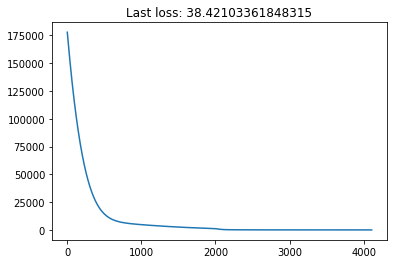

In [124]:
plt.plot(range(len(model.lossHistory)), model.lossHistory)
plt.title(f'Last loss: {model.lossHistory[-1]}')